In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [9]:
%ls

demo_data.csv     rf_model_train.py  training_dataset.csv
ieee_analysis.py  scratch.py         train.ipynb


In [73]:
# Load your processed training dataset
df = pd.read_csv("training_dataset.csv")

In [79]:
# Features and target
X = df[["start_x", "start_y", "end_x", "end_y", "prev_x", "prev_y","delta_start","delta_end"]]#, "prev_speed"
y = df[["next_x", "next_y"]] #, "next_speed"

In [80]:
feature_scaler = StandardScaler()
scaled_X = feature_scaler.fit_transform(X)

target_scaler = StandardScaler()
scaled_y = target_scaler.fit_transform(y)

In [81]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.2, random_state=42)

In [82]:
# Train
# model = RandomForestRegressor(n_estimators=200,random_state=42)
cubic_model = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('linear', LinearRegression())
])

In [83]:
cubic_model.fit(X_train, y_train)

,steps,"[('poly', ...), ('linear', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,False
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [84]:
# Predict
y_pred_scaled = cubic_model.predict(X_test)

y_pred = target_scaler.inverse_transform(y_pred_scaled)

pred_to_plot = y_pred[:10]
real_to_plot = target_scaler.inverse_transform(y_test)[:10]

In [85]:
# Evaluate
mse = mean_squared_error(target_scaler.inverse_transform(y_test), y_pred)
rmse = root_mean_squared_error(target_scaler.inverse_transform(y_test), y_pred)
print("Mean Squared Error:", mse)
print(" Root Mean Squared Error:", rmse)

Mean Squared Error: 229.9662696723653
 Root Mean Squared Error: 14.00109648510458


In [88]:
def plot_helper(points):
    plot_x, plot_y = [], []
    for x, y in points:
        plot_x.append(x)
        plot_y.append(y)
    return plot_x, plot_y

In [89]:
pred_x_plot,pred_y_plot = plot_helper(pred_to_plot)
real_x_plot, real_y_plot = plot_helper(real_to_plot)

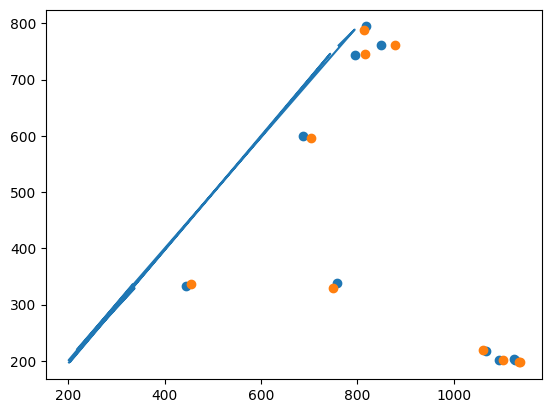

In [ ]:
plt.scatter(pred_x_plot,pred_y_plot)
plt.scatter(real_x_plot, real_y_plot)
plt.show()

In [103]:
X_START_INDEX = 0
Y_START_INDEX = 1
X_END_INDEX = 2
Y_END_INDEX = 3
X_PREV_INDEX = 4
Y_PREV_INDEX = 5
START_DELTA_INDEX = 6
END_DELTA_INDEX = 7

COUNTER = 0

def make_path(start:tuple,end:tuple):
    X_START_INDEX = 0
    Y_START_INDEX = 1
    X_END_INDEX = 2
    Y_END_INDEX = 3
    X_PREV_INDEX = 4
    Y_PREV_INDEX = 5
    START_DELTA_INDEX = 6
    END_DELTA_INDEX = 7

    COUNTER = 0
    
    x_start,y_start = start
    x_end,y_end = end

    x_prev,y_prev = x_start - 1,y_start

    start_delta = np.sqrt(np.square(x_start - x_prev) + np.square(y_start - y_prev))
    end_delta = np.sqrt(np.square(x_end - x_prev) + np.square(y_end - y_prev))

    input = [x_start,y_start,x_end,y_end,x_prev,y_prev,start_delta,end_delta]

    path = []

    while end_delta > 30:
        print(COUNTER)
        if not COUNTER:
            scaled_input = feature_scaler.transform([input])
        else:
            scaled_input = feature_scaler.transform(input)

        COUNTER+=1
        scaled_output = cubic_model.predict(scaled_input)
        output = target_scaler.inverse_transform(scaled_output)

        x, y = output[0][0], output[0][1]

        print(f"{output}")

        path.append((x,y))
        start_delta = np.sqrt(np.square(x_start - x) + np.square(y_start - y))
        end_delta = np.sqrt(np.square(x_end - x) + np.square(y_end - y))

        input[X_PREV_INDEX] = X
        input[Y_PREV_INDEX] = y
        input[START_DELTA_INDEX] = start_delta
        input[END_DELTA_INDEX] = end_delta

    plot_x,plot_y = plot_helper(output)

    plt.plot(plot_x,plot_y)
    plt.show()

make_path((23,45),(335,450))

0
[[1299.8805271  -365.93024958]]
1


/home/neo-new/venvs/scraper_automation_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/neo-new/venvs/scraper_automation_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (8,) + inhomogeneous part.

In [32]:
pred_to_plot[:,-1]

array([1197.61060607, 1444.66121575,  374.8273446 , 1896.47872714,
       -212.56365038,  770.38910714,  175.60030753,  865.99578522,
        168.06154269,  634.90574399])

In [33]:
real_to_plot[:,-1]

array([ 853., 1121.,  125., 2118.,   33.,  457.,  375., 1030.,  176.,
        382.])

In [58]:
speed_model = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('linear', LinearRegression())
])

In [ ]:
rf_model = RandomForestRegressor()

In [69]:
speed_X = df[["delta_start","delta_end","prev_speed"]]
speed_y = df[["next_speed"]]

In [70]:
X_speed_train, X_speed_test, y_speed_train, y_speed_test = train_test_split(speed_X, speed_y, test_size=0.2, random_state=42)

In [71]:
mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64),  # Two layers with 64 and 32 neurons
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

mlp.fit(X_speed_train,y_speed_train)
y_speed_pred = mlp.predict(X_speed_test)
root_mean_squared_error(y_true=y_speed_test, y_pred= y_speed_pred)

/home/neo-new/venvs/scraper_automation_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


457.6762274989826

In [44]:
rf_model.fit(X_speed_train,y_speed_train)
y_speed_pred = rf_model.predict(X_speed_test)
root_mean_squared_error(y_true=y_speed_test, y_pred= y_speed_pred)

/home/neo-new/venvs/scraper_automation_env/lib/python3.12/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


331.31602873533984

In [61]:
speed_model.fit(X_speed_train,y_speed_train)
y_speed_pred = speed_model.predict(X_speed_test)
root_mean_squared_error(y_true=y_speed_test, y_pred= y_speed_pred)

323.0564562984173

In [41]:
df["next_speed"] = df["next_speed"].clip(upper=3000)
print(df["next_speed"].describe())

count    1146.000000
mean      901.898778
std       901.143470
min         0.000000
25%       152.000000
50%       576.000000
75%      1424.000000
max      3000.000000
Name: next_speed, dtype: float64
